#K-means

##Обучение без учителя. Задача кластеризации

Ранее мы работали с размеченными данными. То есть нам были даны не только признаки, но и значения целевой переменной, метки классов. В таких случаях говорят об **обучении с учителем** ($supervised\ learning$).

Напротив, **обучение без учителя** ($unsupervised\ learning$) осуществляется на неразмеченных данных, где задача модели заключается в выявлении скрытых структур или паттернов, таких как классы или группы.

Помимо регрессии и классификации существуют и другие задачи. Одной из них является **кластеризация** — объединение объектов в группы на основе известных признаков.

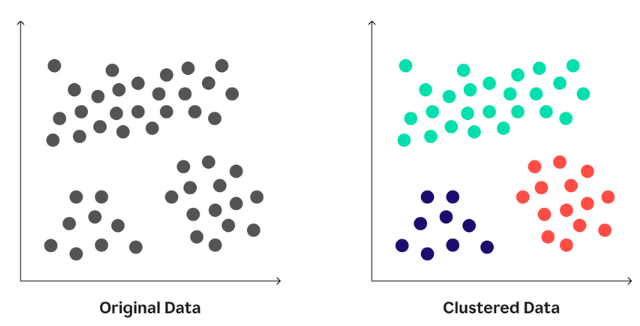


###Примеры

1. **Подписки** пользователей в соцсетях — объединение пользователей в таргет-группы по интересам.
2. Данные о **музыкальных треках** — группировка похожих исполнителей.
3. **Фотографии** в галерее телефона — папки с разными объектами и местами съёмки.
4. Данные о **погоде** в разных регионах — объединение мест для составления общих прогнозов.



###Постановка задачи

Задача кластеризации плохо формализуется. Пусть $n$ — количество рассматриваемых **признаков** объекта. Тогда каждый объект представляет собой набор чисел:

$$x = (x_1, x_2, ..., x_n) = \{ x_i \}_{i=1}^{n}$$

Пусть введена функция **расстояния** между любыми двумя $i$-м $j$-м объектами:

$$\rho=\rho(x^i, x^j)$$

В частности для евклидова пространства:

$$\rho(x^i, x^j) = \sqrt{\sum_{k=1}^{n} (x^i_k - x^j_k)^2}$$

Тогда для **решения** задачи классификации необходимо найти множество кластеров $Y$ и функцию $f$ такие, что каждый кластер состоит из близких объектов и объекты из разных кластеров сильно различаются:

$$ f: \mathbb{R}^n \rightarrow Y $$  

Задача кластеризации принципиально неоднозначна. Ниже приведена иллюстрация, попытайтесь ответить на вопрос: сколько здесь кластеров?

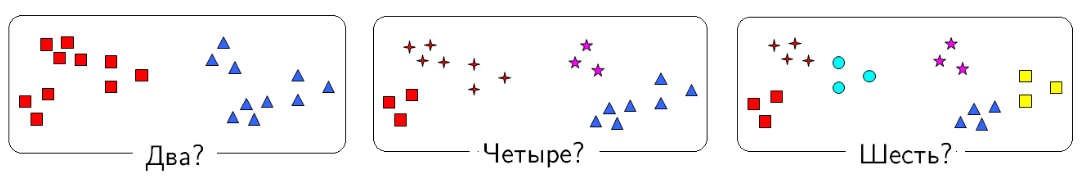

##Решение задачи кластеризации методом К-means

Так как задача неоднозначна, к её решению существует несколько подходов. Самым простым является алгоритм **K-means** (K-средних).

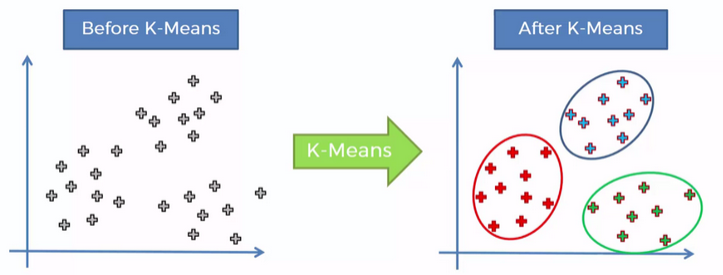

Допустим, мы хотим разбить данные на $K$ кластеров. Это число задаётся нами заранее и является **гиперпараметром**, в честь которого метод получил название. Далее действуем по **алгоритму**:

1. Среди всех точек выбираем $K$ случайных $\{ x^j \}_{j=1}^{K}$. Их будем считать начальными приближениями **центров** кластеров.

$$C = \{ c^k \}_{k=1}^{K}$$

2. Относим каждый $i$-й объект к ближайшему к нему центру $c^k$. Получили $K$ **групп** $G_k$ объектов.

$$y^i = k: \rho(x^i, c^k) \rightarrow min$$

3. Внутри группы $G_k$ из $g_k$ элементов вычисляем координаты нового центра как **среднее** арифметическое по всем осям.

$$c^k = \frac{1}{g_k} \sum_{x^i \in G_k} x^i$$

4. Останавливаеся, если положения кластеров стабилизировались или достигнуто максимальное число итераций. Иначе возвращаемся к шагу 2.

## Простая реализация K-means на Python

Импортируем numpy, зафиксируем случайность.

In [ ]:
import numpy as np

np.random.seed(42)

Будем придерживаться традиционной структуры модели машинного обучения:

```python
class KMeans:
    def __init__(self, *args, **kwargs):
        ...
    def fit(self, X):
        ..
    def predict(self, X):
        ...
```

Реализуем **инициализацию** модели с заданным числом кластеров и максимальным числом итераций:

```python
def __init__(self, n_clusters: int, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
```

Реализуем метод `fit()`. Он принимает на вход признаки объектов $X$. Центроиды инициализируем случайными значениями, выбирая несколько экземляров из $X$:


```python
def fit(self, X):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
    self.centroids = X[random_indices]
```

На каждой итерации вычисляем расстояния от объектов до центроид, группируем объекты, вычисляем координаты новых центров:

```python
    for _ in range(self.max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
```

Если центры не изменились с прошлой итерации, то есть стабилизировались, прекращаем обучение:

```python
        if np.all(new_centroids == self.centroids):
            break
        self.centroids = new_centroids
```

Реализуем метод определения ближайшего кластера для новых данных $X$:

```python
def predict(self, X):
    distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
    return np.argmin(distances, axis=1)
```

Воспользуемся написанным кодом, запустим ячейку с реализованным классом.

In [ ]:
class KMeans:
    def __init__(self, n_clusters: int, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        np.random.seed(42)
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

## Пример решения простой задачи. Кластеризация облаков точек

###Постановка задачи

Дано несколько облаков точек, то есть явно выраженных пятен из точек. Необходимо сгруппировать их в центры.


Приведём синтетический датасет. На этапе обучения метки `y_true` нам неизвестны:

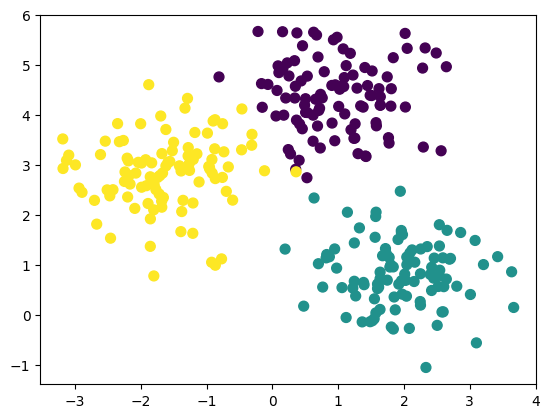

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50)
plt.show()

###Решение

Используем реализованную нами модель. Количество кластеров выставим как 3.

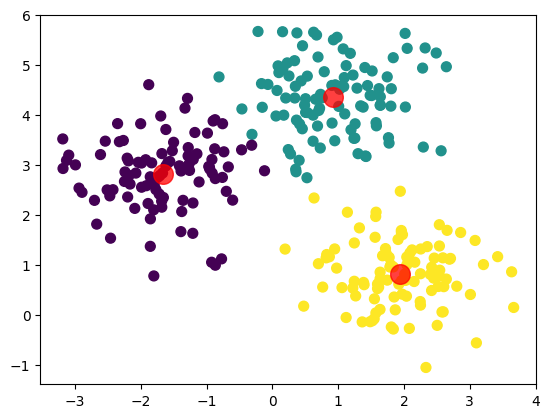

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


Модель работает. Отметим, что объекты с границ кластеров относятся не к тем группам, к которым относятся в датасете. Это логичное ограничение предсказания с использованием K-means.

##Метод локтя

###Описание

Очевидно, что количество кластеров при решении реальных задач нам неизвестно. Для алгоритма K-means **гиперпараметр** $K$ крайне существенен, его неправильный выбор делает модель бессмысленной.

Для **поиска** гиперпараметров существует множество методов. Для $K$ в данном алгоритме традиционно применяют **метод локтя**.

Очевидно, что кластеры нужно строить так, чтобы сумма расстояний (или квадратов расстояний) между центрами и относящимися к ним объектами был минимальна. Поэтому метод локтя основывается на вычислении этой суммы, обозначаемой как **инерция** $I(K)$, для различных последовательных значений K:

$$I(K) = \sum_{k=1}^{K} \sum_{x^j \in G_k} \rho(x^j, c^k)^2,$$
$$\rho(x^j, c^k) = \sum_{i=1}^{n} (x^j_i - c^k_i)^2$$

Чем сумма квадратов расстояний от объектов до центров меньше, тем лучше. График зависимости $I$ от $K$ имеет вид излома, **локтя**, указывающего на точку, после которой дальнейшее увеличение K приводит к незначительному уменьшению инерции, что и является предполагаемым оптимальным числом кластеров.

###Применение для облака точек


В дальнейшем будем использовать готовую реализацию `KMeans` из `sklearn`, так как там $inertia$ подсчитывается автоматически. Продемонстрируем работу метода локтя для облака точек из нашей задачи. Будем перебирать $K$ от $1$ до $10$.

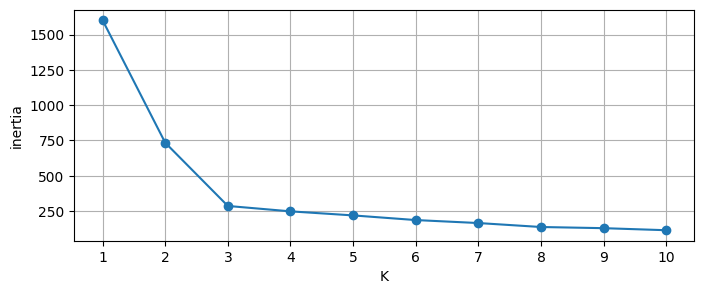

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.grid()
plt.show()


Видно, что излом соответствует точке $K=3$. Дальнейшее увеличение числа кластеров незначительно улучшает качество работы модели.

##Метод силуэта

###Описание

**Метод силуэта** ($silhouette\ method$) — это техника для оценки качества кластеризации, основанная на том, насколько близко объекты внутри кластера по сравнению с другими кластерами.

Пусть $a(x^j)$ — среднее расстояние от объекта $x^j$ до всех остальных объектов в том же кластере, а $b(x^j)$ — минимальное среднее расстояние от $x^j$ до объектов в ближайшем кластере. Силуэтный коэффициент для объекта $x^j$ определяется как:

$$s(x^j) = \frac{b(x^j) - a(x^j)}{\max(a(x^j), b(x^j))}$$

Коэффициент принимает значения от $-1$ до $1$. Большие значения соответствуют лучшим результатам.

###Применение для облака точек



Воспользуемся готовой реализацией из `sklearn`. Переберём $K$ от $1$ до $10$.

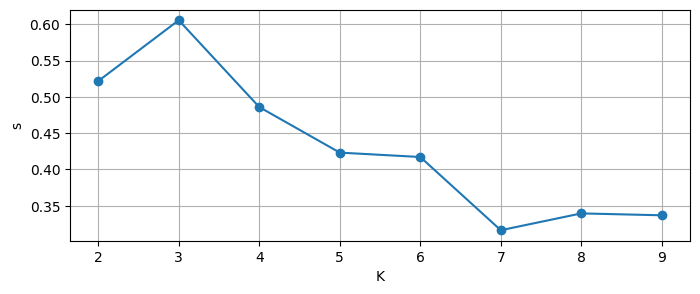

In [ ]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 3))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('K')
plt.ylabel('s')
plt.xticks(k_values)
plt.grid()
plt.show()


Максимум приходится на $K=3$.

##Недостатки K-means



Этот алгоритм является самым простым для решения задачи кластеризации. Поэтому он обладает **множеством проблем**.

###Чувствительность к инициализации

Алгоритм чувствителен к тому, как заданы **начальные координаты** центроид.

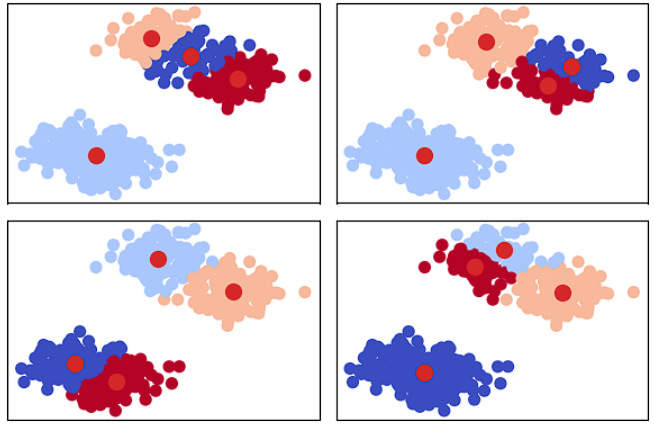

###Форма кластеров

K-means предполагает, что кластеры имеют **эллипсоидную** форму. Иначе кластеризация однозначно произойдёт неправильно.

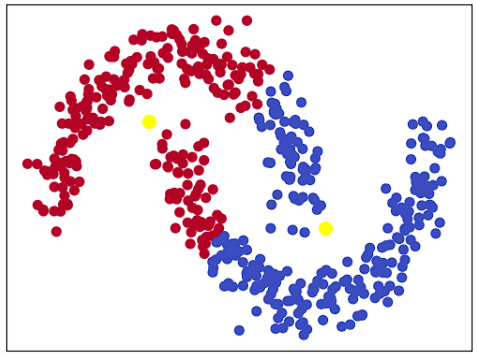

###Чувствительность к выбросам

Выбросы смещают положение центроид и могут быть неправильно кластеризованы. На иллюстрации положения центроид белого и синего кластеров смещены вбок.

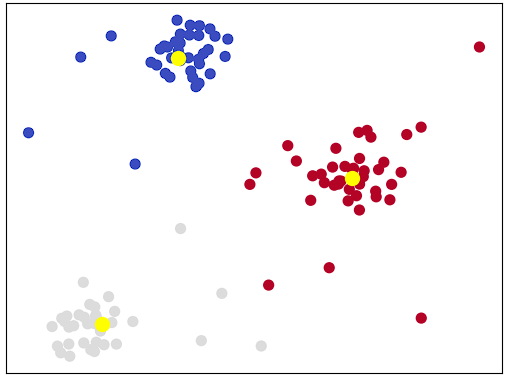

###Разная плотность кластеров

Если один из кластеров явно плотный, а другой **разреженный**, то K-means может ошибочно включать точки последнего в первый.

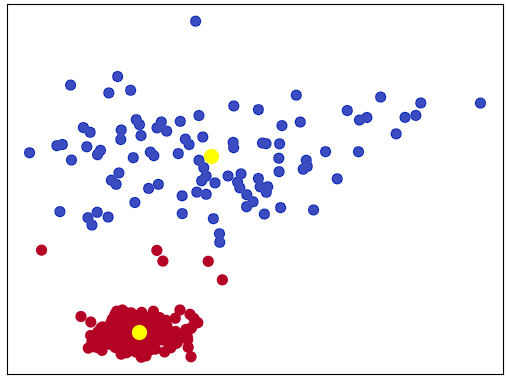

###Прочие проблемы

K-means плохо работает с **большими наборами** данных. На каждой итерации перебираются все объекты выборки, что медленно. Для решения этой проблемы можно применять `MiniBatchKMeans`, который обрабатывает не все объекты группы, а только репрезентативную часть.

Алгоритм **не** улавливает **линейную зависимость** между признаками, что может сделать кластеризацию менее эффективной.

###Алгоритмы кластеризации помимо K-means

При решении реальных задач K-means хотя и используют благодаря его простоте и понятности, он может не давать информативных результатов. Выше приведены примеры соответствующих проблем. Поэтому рекомендуется использовать другие алгоритмы, например, **DBSCAN**.

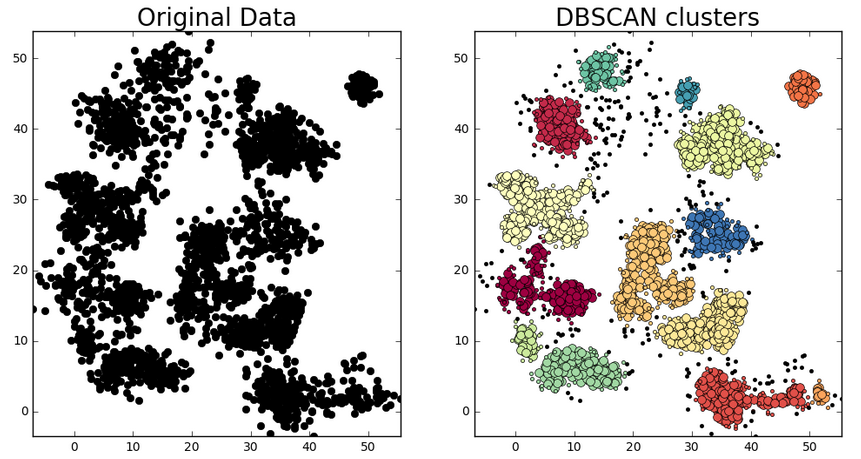

##Решение реальной задачи с Kaggle. Кластеризация пользователей по отклику

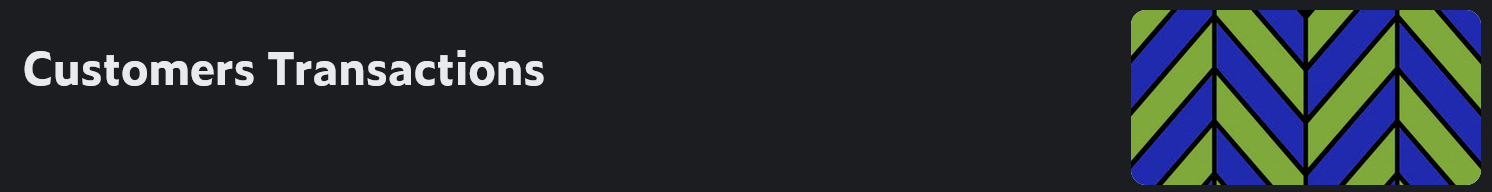

[Датасет](https://www.kaggle.com/datasets/fares279/customers-transactions) Customer Transactions Dataset представляет собой синтетический набор данных об активности покупателей в сфере **электронной коммерции** за 2024–2025 годы.

В нём содержится 10 000 записей, каждая из которых описывает поведение одного клиента: возраст, пол, страну, уровень дохода, количество покупок, частоту посещений сайта и другие характеристики. Присутствуют также метрики лояльности, такие как `spending_score`, и показатель `cart_abandon_rate`, отражающий долю брошенных корзин.

Поле `churned` показывает, ушёл ли клиент ($1$) или остался активным ($0$). Необходимо независимо от этой разметки произвести кластеризацию на две группы.

###Сбор данных

Установим библиотеку для скачивания датасета

In [1]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [2]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [3]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/fares279/customers-transactions'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/fares279/customers-transactions


100%|██████████| 224k/224k [00:00<00:00, 395MB/s]

In [4]:
os.listdir('./customers-transactions')

['Customer_Transactions.csv']

###Исследование данных

Импортируем основные библиотеки для анализа данных.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('./customers-transactions/Customer_Transactions.csv')

In [7]:
data.head()

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21


Имеется 10000 записей с 14 признаками.

In [8]:
data.shape

(10000, 14)

Пропуски отсутствуют.

In [9]:
data.isna().sum().sum()

np.int64(0)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
age,10000.0,44.045800,15.404669,18.00,31.00,44.00,57.00,70.00
annual_income,10000.0,86067.676100,38986.787991,20028.00,55345.50,78339.50,115570.50,179960.00
spending_score,10000.0,50.924200,28.753395,1.00,26.00,51.00,75.00,100.00
num_purchases,10000.0,22.576000,10.163639,1.00,14.00,22.00,31.00,49.00
avg_purchase_value,10000.0,47.447480,11.205902,16.75,39.50,46.99,55.08,83.27
membership_years,10000.0,6.340500,4.680657,0.00,2.00,6.00,10.00,15.00
website_visits_per_month,10000.0,15.578100,8.655322,1.00,8.00,16.00,23.00,30.00
cart_abandon_rate,10000.0,0.501216,0.286836,0.00,0.25,0.51,0.75,1.00
churned,10000.0,0.109000,0.311655,0.00,0.00,0.00,0.00,1.00


Один предполагаемый кластер больше другого в 9 раз.

In [11]:
data['churned'].value_counts()

,count
churned,
0,8910
1,1090


Построим гистограммы.

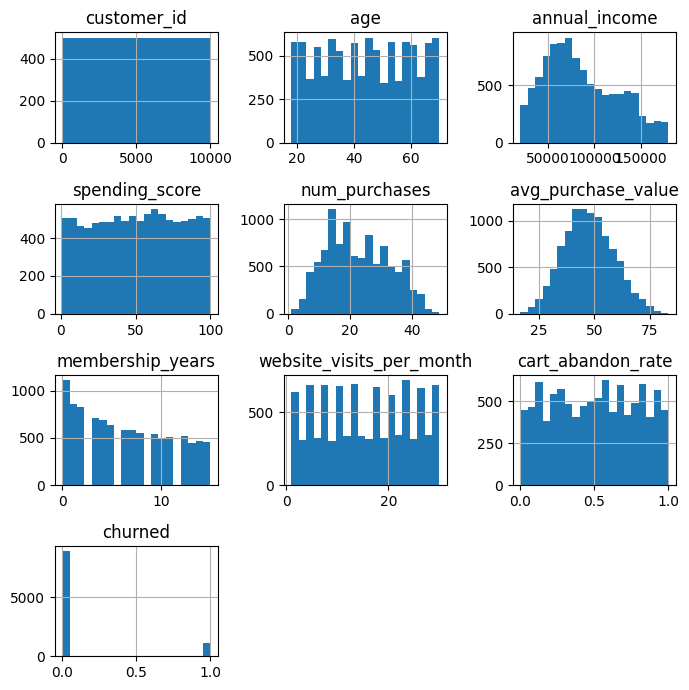

In [12]:
data.hist(bins=20, figsize=(7, 7))
plt.tight_layout()
plt.show()

Построим матрицу корреляции.

<Axes: >

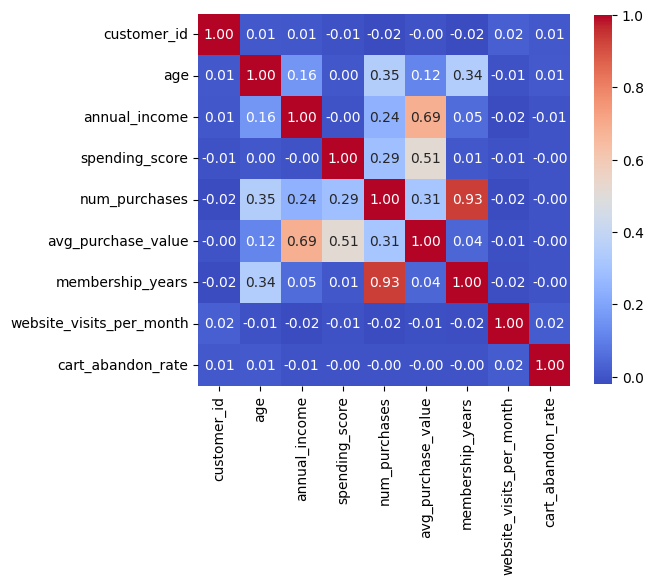

In [13]:
import seaborn as sns

numerical_data = data.select_dtypes(include=['int64', 'float64']).drop(columns=['churned'])
corr = numerical_data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

Сильная корреляция только между временем членства и количеством покупок.

###Подготовка данных

Разделим признаки и предполагаемую метку кластера.

In [14]:
X = data.drop(columns=['churned'])
y_true = data['churned']

Пересчитаем столбец с датой последней покупки пользователя в давность этой покупки.

In [15]:
X["last_purchase_date"] = pd.to_datetime(X["last_purchase_date"])
recency_reference = X["last_purchase_date"].max()
X["recency_days"] = (recency_reference - X["last_purchase_date"]).dt.days

Закодируем данные о поле и стране в столбцы в виде нулей и единиц.


In [16]:
gender_dummies = pd.get_dummies(X["gender"], drop_first=True)
country_dummies = pd.get_dummies(X["country"], drop_first=True)

Займёмся отбором признаков. Отберём числовые признаки.

In [17]:
data_numerical = X.drop(columns=["customer_id", "feedback_text", "last_purchase_date", "gender", "country"])

Стандартизируем числовые признаки.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_numerical_s = scaler.fit_transform(data_numerical)
data_numerical = pd.DataFrame(data_numerical_s, columns=data_numerical.columns)

Объединим признаки.

In [19]:
X = pd.concat([data_numerical, gender_dummies, country_dummies], axis=1)

In [20]:
X.head()

,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,recency_days,Male,Brazil,Canada,France,Germany,India,Japan,South Africa,UK,USA
0,-0.457404,-0.004660,-1.284233,-0.450255,-0.557545,-0.072750,0.510914,1.564679,-0.011432,True,False,False,False,True,False,False,False,False,False
1,-0.262648,-1.154979,-1.632035,-1.237414,-1.402677,-0.500062,1.550788,-1.015320,-0.887086,True,False,False,False,False,True,False,False,False,False
2,1.619992,1.482662,0.280878,1.616037,1.652116,1.209186,1.204163,-1.468564,-0.078790,False,False,False,False,False,False,False,False,False,False
3,-0.911834,0.030610,-0.206045,1.124063,0.394680,1.209186,-0.991128,0.379274,-0.430548,True,False,False,False,False,False,False,False,True,False
4,1.619992,0.631279,-0.379946,1.517643,1.088099,1.422841,0.048747,-0.039104,-0.003948,False,False,False,False,False,False,False,False,True,False


###Моделирование

Применим метод **локтя** для поиска параметра $K$. Параметр `n_init` определяет, сколько раз случайным образом будут проинициализированы центроиды.

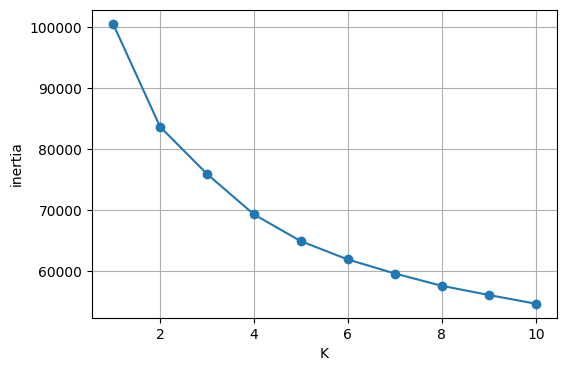

In [21]:
from sklearn.cluster import KMeans


ks = list(range(1, 11))
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(ks, inertias, marker="o")
plt.xlabel("K")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

Метод локтя показывает себя неинформативно: изгиб достаточно плавный, нет излома. Примени метод **силуэта**.

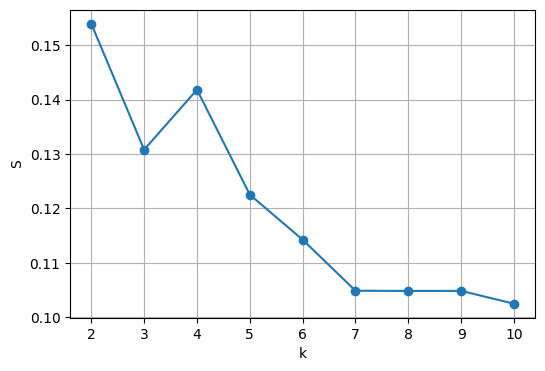

In [22]:
from sklearn.metrics import silhouette_score


sil_scores = []
ks2 = list(range(2, 11))
for k in ks2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(ks2, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("S")
plt.grid(True)
plt.show()

Максимум приходится на 2. Отметим, что для $K=4$ присутствует пик, то есть существуют некоторые скрытые связи в данных такие, что возможно и деление на 4 группы.

Инициализируем и обучим модель. Предскажем метки кластеров. Посчитаем количество объектов в кластерах. Выбор `n_clusters` обсудим далее.

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

print("Cluster sizes:\n", pd.DataFrame(labels).value_counts().sort_index())

Cluster sizes:
 0
0     786
1    3816
2    2539
3    2859
Name: count, dtype: int64


При кластеризации с $K=2$ получаем две группы примерно по $4500$ объектов. Допустим, мы изначально знали о данных, что один кластер значительно больше другого. Например, предполагаем, что в основном взаимодействие клиентов с платформой положительное.

Поэтому необходимо продолжать кластеризацию. Примем $K=4$. Как видно, один кластер действительно вышел малочисленным. Объединим остальные в один большой и построим **матрицу ошибок**.

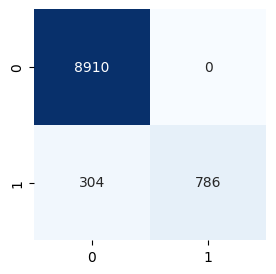


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      8910
           1       1.00      0.72      0.84      1090

    accuracy                           0.97     10000
   macro avg       0.98      0.86      0.91     10000
weighted avg       0.97      0.97      0.97     10000



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


new_labels = np.where(labels == 0, 1, 0)

conf_matrix = confusion_matrix(y_true, new_labels)
class_report = classification_report(y_true, new_labels)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

print("\nClassification Report:\n", class_report)

Для наиболее многочисленного ($0$) и более редкого класса ($1$) модель верно идентифицирует все истинно принадлежащие им объекты. Около $35\%$ данных из малочисленного класса ошибочно отнесены к большему.

Действительно, это связано с дисбалансом в датасете. Мы не можем устранить эту проблему, так как при кластеризации метки классов нам неизвестны. В противном случае можно было бы либо урезать больший класс ($undersampling$) до размеров меньшего, либо раздуть меньший дубликатами до размеров большего ($oversampling$).

###Метод главных компонент

Для двумерной визуализации используем **метод главных компонент** ($PCA$). Для данных, в общем случае многомерных, он выделяет направления многомерного пространства, вдоль которых разброс значений наибольший. Переход к новой системе координат, связанной с этими направлениями, полезен при предобработке данных, когда признаков много. Из новых осей можно отобрать только наиболее информативные и работать с ними.

Применим $PCA$ к $X$. Оставим два направления и визуализируем.

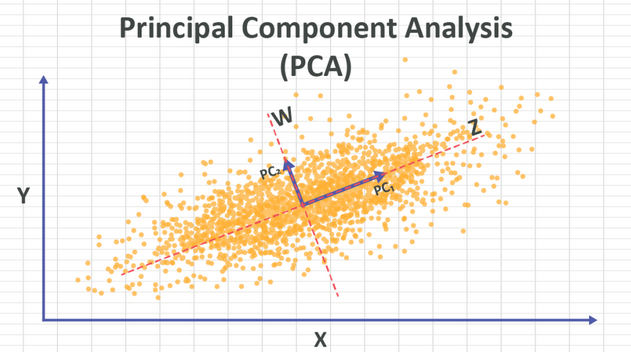

Алгоритм $PCA$ реализован в `sklearn`.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X)

Пересчитаем координаты центроид.

In [26]:
new_center = X[new_labels == 0].mean(axis=0)
new_centers = np.vstack([centers[0], new_center])

Расположим объекты на графике.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


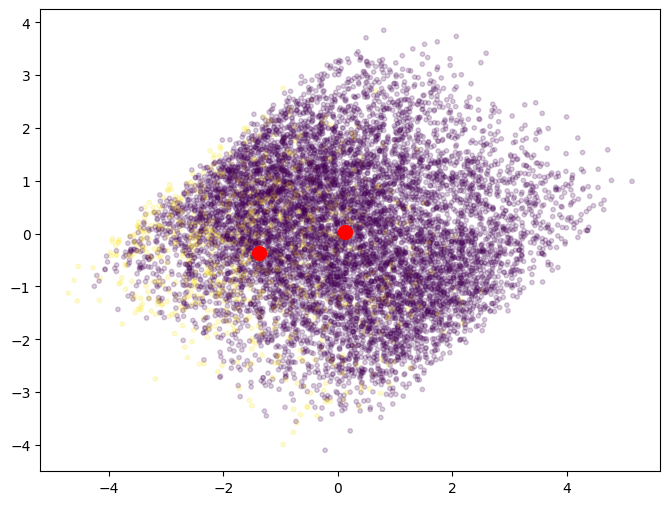

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=new_labels, s=10, alpha=0.2)
centers_pca = pca.transform(new_centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, marker='o')
plt.show()


В пространстве главных компонент кластеры пересекаются. И всё же видно, что они пространственно разделены. Для лучшей видимости произведём разбиение в `3D`, визуализируем через `plotly`.

In [38]:
import plotly.graph_objects as go

pca = PCA(n_components=3, random_state=42)
proj = pca.fit_transform(X)

new_center = X[new_labels == 0].mean(axis=0)
new_centers = np.vstack([centers[0], new_center])
centers_pca = pca.transform(new_centers)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=proj[:, 0],
    y=proj[:, 1],
    z=proj[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.5,
        color=new_labels,
        colorscale='Viridis',
        showscale=True
    ),
))

fig.add_trace(go.Scatter3d(
    x=centers_pca[:, 0],
    y=centers_pca[:, 1],
    z=centers_pca[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='circle'),
))

fig.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



#Выводы

В ходе данного занятия мы:

1. Ознакомились с обучением без учителя и задачей кластеризации.
2. Формализовали задачу.
3. Реализовали K-means с нуля.
4. Решили простую задачу на кластеризацию облаков точек.
5. Научились искать гиперпараметр $K$ методами локтя и силуэта.
6. Описали недостатки метода K-means.
7. Упомянули DBSCAN.
8. Решили реальную задачу с Kaggle на кластеризацию клиентов электронной коммерции.
9. Научились применять $PCA$ для визуализации данных.


##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Воронцов, К. В. Математические модели машинного обучения: кластеризация и частичное обучение : [курс лекций]. – Текст : электронный / К. В. Воронцов ; МФТИ. – Москва, 2025. – URL: http://www.machinelearning.ru/wiki/images/5/52/Voron-ML-Clustering-SSL-slides.pdf (дата обращения: 01.11.2025).
2. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
3. Кантор, В. Кластеризация. – Текст : электронный / В. Кантор ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/klasterizaciya (дата обращения: 01.11.2025).
4. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.


#Приложения. Код для построения иллюстраций

##Чувствительность K-means к инициализации

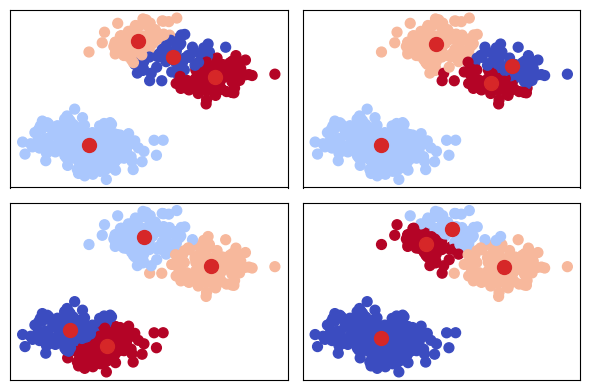

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

X, y = make_blobs(n_samples=500, centers=4, cluster_std = 2)

fig, axes = plt.subplots(2, 2, figsize=(6, 4))

for ax in axes.flatten():
    kmeans = KMeans(n_clusters=4)
    y_kmeans = kmeans.fit_predict(X)

    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='coolwarm')
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='tab:red', s=100)

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


##Зависимость K-means от формы кластеров

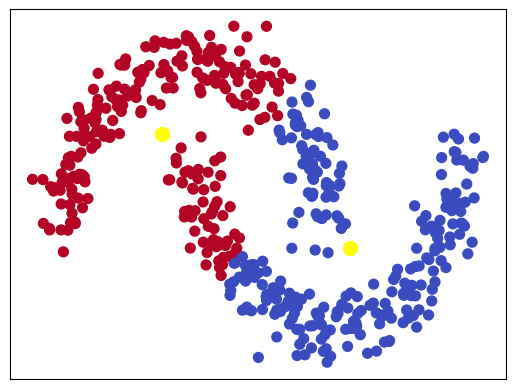

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=500, noise=0.1)

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='coolwarm')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=100)
plt.xticks([])
plt.yticks([])
plt.show()


##Чувствительность K-means к выбросам

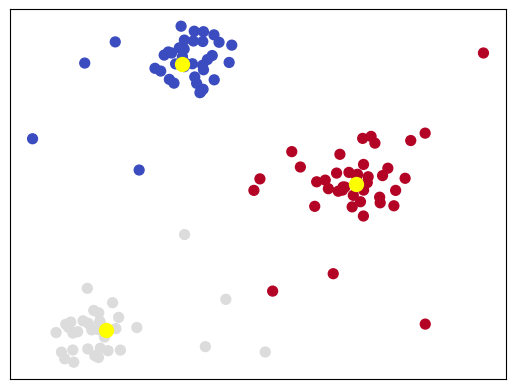

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack((X, outliers))

kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='coolwarm')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=100)
plt.xticks([])
plt.yticks([])
plt.show()


##Чувствительность K-means к плотности кластеров

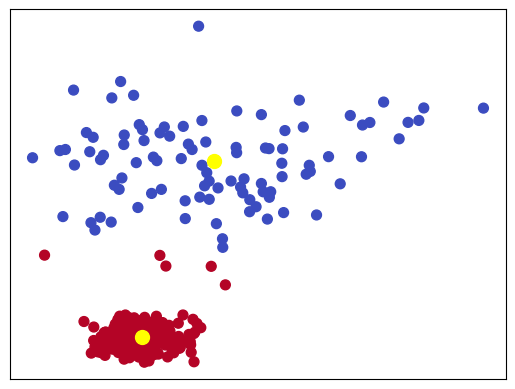

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

X_dense, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5)
X_sparse, _ = make_blobs(n_samples=100, centers=1, cluster_std=2.5)
X = np.vstack((X_dense, X_sparse))

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='coolwarm')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=100)
plt.xticks([])
plt.yticks([])
plt.show()
